**Data visualization notes**

by Ben Lacar


# Setup

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Create list of color variables.
F_purple = '#530080'
F_violet = '#9D0081'
F_magenta = '#E60082'
F_orange = '#FFAA00'
F_red = '#D90000'
F_lime = '#97E600'
F_green = '#005900'
F_teal = '#00BFBF'
F_blue = '#002680'
F_colors = [F_purple, F_violet, F_magenta, F_orange, F_red, F_lime, F_green, F_teal, 'gray', 'black', F_blue]

# Create dataframe with random numbers

In [15]:
df = pd.DataFrame(np.random.rand(100, 5),
                  columns=['col_' + str(i) for i in range(5)],
                  index=['index_' + str(i) for i in range(100)])

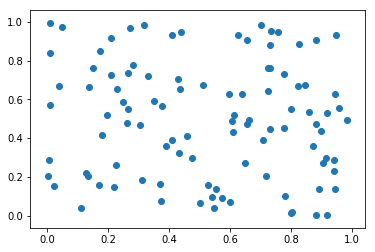

In [18]:
f, ax1 = plt.subplots()
ax1.scatter(df['col_1'], df['col_2']);

In [2]:
import matplotlib

In [3]:
matplotlib.__version__

'2.2.3'

In [20]:
parent_path = 'C:\\Users\Benjamin.Lacar\Documents\Box\Box Sync\BL (Benjamin.Lacar@fluidigm.com)\\'

# Path to the EA report
child_path1 = 'Juno_AccessArray\\Willamette\\AV-SVT dataAnalysis\\WhitePaper_StudyGuidelines_ExampleData\\'
# Path to the EA report
child_path2 = 'Juno_AccessArray\Willamette\AV-SVT dataAnalysis\\EAreport_180131_WordDoc\\'
os.chdir(parent_path + child_path2)

## Import data

- Data was provided in a Word document. I simply copied and pasted into an Excel sheet first
- Parse sample names to get sample type, IFC type, sample amount, replicate, IFC number

In [23]:
df_read_metrics = pd.read_excel('EA_report_raw_table5.xlsx')
df_read_metrics.head()

,Sample Name,%Bases covered at ≥50x,Mean Depth,%Mapping to genome,%Mapping to targeted regions,%Amplicons within 5x of mean depth,Saliva 1_192_IFC1_Rep_1
0,Saliva 1_192_IFC1_Rep_1,100.0,1227.42,99.98,100.00,100.0,Saliva 1_192_IFC1_Rep_2
1,Saliva 1_192_IFC1_Rep_2,100.0,1058.74,99.99,100.00,100.0,Saliva 1_192_IFC1_Rep_3
2,Saliva 1_192_IFC1_Rep_3,100.0,1014.91,99.98,100.00,100.0,Saliva 1_192_IFC2
3,Saliva 1_192_IFC2,100.0,677.62,99.79,99.95,100.0,Saliva 1_192_IFC3
4,Saliva 1_192_IFC3,100.0,381.43,99.78,99.99,100.0,Saliva 1_48_IFC10_Rep_1


In [24]:
def parse_sample_name(df):
    df_sample_name_split = df['Sample Name'].str.split('_', expand=True)
    
    # Get sample
    df['sample'] = df_sample_name_split[0]
    
    # Get IFC type
    ifc_type = list()
    for index,entry in enumerate(df_sample_name_split[1]):
        if (entry=='192') | (entry=='48'):
            ifc_type.append(entry)
        elif ((df_sample_name_split[2].iloc[index]=='192')
              | (df_sample_name_split[2].iloc[index]=='48')):
            ifc_type.append(df_sample_name_split[2].iloc[index])
        else:
            ifc_type.append('no IFC type')
    df['ifc_type'] = ifc_type
    
    # Get S value if applicable
    s_value = list()
    for index,entry in enumerate(df_sample_name_split[1]):
        if (entry=='S1') | (entry=='S2'):
            s_value.append(entry)
        else:
            s_value.append(None)
    df['s_value'] = s_value

    # Get amount, assign to 100 if not in sample name
    amount = list()
    for index,entry in enumerate(df_sample_name_split[1]):
        if (entry=='60ng'):
            amount.append(entry)
        else:
            amount.append('100ng (presumed)')
    df['amount'] = amount
    
    # Get IFC number
    ifc_no_list = ['IFC' + str(i+1) for i in range(15)]
    ifc_number = list()
    for index,entry in enumerate(df_sample_name_split[2]):
        if entry in ifc_no_list:
            ifc_number.append(entry)
        elif df_sample_name_split[3].iloc[index] in ifc_no_list:
            ifc_number.append(df_sample_name_split[3].iloc[index])
        else:
            ifc_number.append('no IFC number')
    df['ifc_number'] = ifc_number
        
    # Get replicate
    rep = list()
    for index,entry in enumerate(df_sample_name_split[3]):
        if entry=='Rep':
            rep.append('Rep_' + df_sample_name_split[4].iloc[index])
        elif df_sample_name_split[4].iloc[index]=='Rep':
            rep.append('Rep_' + df_sample_name_split[5].iloc[index])
        else:
            rep.append(None)
    df['replicate'] = rep
        
    df.set_index('Sample Name', inplace=True)
    return(df)

In [25]:
df_read_metrics = parse_sample_name(df_read_metrics)

In [26]:
df_read_metrics.head()

,%Bases covered at ≥50x,Mean Depth,%Mapping to genome,%Mapping to targeted regions,%Amplicons within 5x of mean depth,Saliva 1_192_IFC1_Rep_1,sample,ifc_type,s_value,amount,ifc_number,replicate
Sample Name,,,,,,,,,,,,
Saliva 1_192_IFC1_Rep_1,100.0,1227.42,99.98,100.00,100.0,Saliva 1_192_IFC1_Rep_2,Saliva 1,192,None,100ng (presumed),IFC1,Rep_1
Saliva 1_192_IFC1_Rep_2,100.0,1058.74,99.99,100.00,100.0,Saliva 1_192_IFC1_Rep_3,Saliva 1,192,None,100ng (presumed),IFC1,Rep_2
Saliva 1_192_IFC1_Rep_3,100.0,1014.91,99.98,100.00,100.0,Saliva 1_192_IFC2,Saliva 1,192,None,100ng (presumed),IFC1,Rep_3
Saliva 1_192_IFC2,100.0,677.62,99.79,99.95,100.0,Saliva 1_192_IFC3,Saliva 1,192,None,100ng (presumed),IFC2,None
Saliva 1_192_IFC3,100.0,381.43,99.78,99.99,100.0,Saliva 1_48_IFC10_Rep_1,Saliva 1,192,None,100ng (presumed),IFC3,None


In [27]:
def create_sampletype_list(df, sample_column):
    mmqci_list = ['G211A', 'G211B', 'G211C', 'G211D', 'G211E', 'G211F']

    buccal_list = (['Buccal Swab 1', 'Buccal Swab 2', 'Buccal Swab 3',
                     'Buccal Swab 4', 'Buccal Swab 5'])
    saliva_list = (['Saliva 1', 'Saliva 2', 'Saliva 3', 'Saliva 4', 'Saliva 5'])
    whole_blood_list = (['Whole Blood 1', 'Whole Blood 2', 'Whole Blood 3',
                         'Whole Blood 4', 'Whole Blood 5'])
    bucc_sal_wb_list = buccal_list + saliva_list + whole_blood_list
    
    # Get gDNA from exclusion of mmqci, sal_bucc_wb lists; includes NIST samples
    gdna_list = (np.setdiff1d(df[sample_column].unique(),
                             (mmqci_list + bucc_sal_wb_list)).tolist())
    nist_list = ['NA12878', 'NA24143', 'NA24149']
    return (mmqci_list, buccal_list, saliva_list, whole_blood_list, gdna_list, nist_list)

In [28]:
(mmqci_list, buccal_list, saliva_list, whole_blood_list, gdna_list, nist_list) = (
    create_sampletype_list(df_read_metrics, 'sample'))

In [29]:
sample_type_lists = ([mmqci_list, buccal_list, saliva_list, whole_blood_list,
                      gdna_list])
sample_type_name = ['MMQCI', 'Buccal', 'Saliva', 'Whole blood', 'Coriell']

In [30]:
# To be used as needed
nist_list

['NA12878', 'NA24143', 'NA24149']

In [31]:
def assign_sample_type(df, sample_type_list_of_lists, sample_type_assignment):
    df['sample_type'] = None
    for index, value in enumerate(sample_type_list_of_lists):
        mask = df['sample'].isin(value)
        df.loc[mask, 'sample_type'] = sample_type_assignment[index]  
    return df

In [32]:
df_read_metrics = assign_sample_type(df_read_metrics, sample_type_lists, sample_type_name)

In [33]:
df_read_metrics.head()

,%Bases covered at ≥50x,Mean Depth,%Mapping to genome,%Mapping to targeted regions,%Amplicons within 5x of mean depth,Saliva 1_192_IFC1_Rep_1,sample,ifc_type,s_value,amount,ifc_number,replicate,sample_type
Sample Name,,,,,,,,,,,,,
Saliva 1_192_IFC1_Rep_1,100.0,1227.42,99.98,100.00,100.0,Saliva 1_192_IFC1_Rep_2,Saliva 1,192,None,100ng (presumed),IFC1,Rep_1,Saliva
Saliva 1_192_IFC1_Rep_2,100.0,1058.74,99.99,100.00,100.0,Saliva 1_192_IFC1_Rep_3,Saliva 1,192,None,100ng (presumed),IFC1,Rep_2,Saliva
Saliva 1_192_IFC1_Rep_3,100.0,1014.91,99.98,100.00,100.0,Saliva 1_192_IFC2,Saliva 1,192,None,100ng (presumed),IFC1,Rep_3,Saliva
Saliva 1_192_IFC2,100.0,677.62,99.79,99.95,100.0,Saliva 1_192_IFC3,Saliva 1,192,None,100ng (presumed),IFC2,None,Saliva
Saliva 1_192_IFC3,100.0,381.43,99.78,99.99,100.0,Saliva 1_48_IFC10_Rep_1,Saliva 1,192,None,100ng (presumed),IFC3,None,Saliva


In [62]:
df_read_metrics.to_excel('read_metrics_summarized.xlsx')

## Create visualizations

In [34]:
df = df_read_metrics.copy()

In [35]:
xorder = ['Coriell', 'MMQCI', 'Buccal', 'Saliva', 'Whole blood']

In [36]:
col_metric = '%Mapping to genome'
group = 'sample_type'

In [37]:
for index, value in enumerate(xorder):
    xvals = df.groupby(group)[col_metric].get_group(value).mean()
    print(index, value, xvals)
    #value = df.groupby(group)[col_metric].get_group(value).mean()

0 Coriell 99.93908139534906
1 MMQCI 99.93921397379907
2 Buccal 99.90316666666658
3 Saliva 99.92807017543855
4 Whole blood 99.93821428571427


In [41]:
def create_box_plots(df, col_metric, group,
                     yvalmin, yvalmax, no_axis_ticks,
                     label_offset, save):
    
    f, (ax1) = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(6,4))
    xorder = ['Coriell', 'MMQCI', 'Buccal', 'Saliva', 'Whole blood']
    sns.boxplot(x=group, y=col_metric, data=df, order=xorder,
                color=F_violet, boxprops=dict(alpha=.95), ax=ax1);

    ax1.set_xticklabels(labels=xorder, size=14)
    ax1.tick_params(axis='y', labelsize=16);
    ax1.set_ylim(yvalmin, yvalmax);
    ax1.yaxis.set_major_locator(plt.MaxNLocator(no_axis_ticks))

    vals = ax1.axes.get_yticks();
    ax1.set_yticklabels(['{:.1f}%'.format(x) for x in vals]);
    ax1.set(xlabel='', title='')
    # Insert a space after %
    ax1.set_ylabel(col_metric[0:1] + ' ' + col_metric[1:], fontsize=18);

    # Label the averge above the highest value
    for index, value in enumerate(xorder):
        xvals = df.groupby(group)[col_metric].get_group(value).mean()
        ax1.text(index, df.groupby(group)[col_metric].max().max() + label_offset,
                 str("%.2f" % (xvals)), fontsize=14, ha='center')

    # Figure properties 
    ax1.spines['bottom'].set_color('#d3d3d3')
    ax1.spines['left'].set_color('#d3d3d3')
    
    sns.set(font='Proxima Nova')
    sns.set_style(style='white')
    sns.despine()
    plt.subplots_adjust(bottom=0.1, top=0.92, left=0.2, right=0.97)

    if save=='yes':
        plt.savefig(col_metric.replace('%', 'pct ').replace(' ', '_').lower()+'.png', dpi=400)

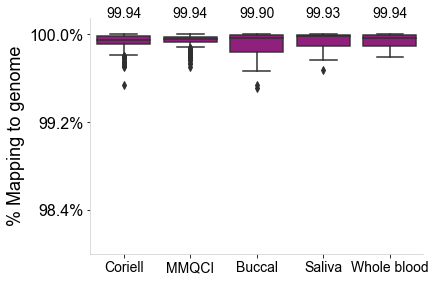

In [42]:
create_box_plots(df_read_metrics, '%Mapping to genome', 'sample_type',
                 yvalmin=98, yvalmax=100.15, no_axis_ticks=3,
                 label_offset=0.15, save='yes')

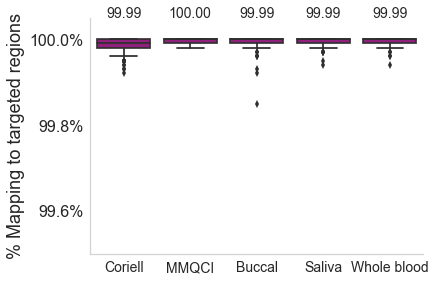

In [43]:
create_box_plots(df_read_metrics, '%Mapping to targeted regions', 'sample_type',
                 yvalmin=99.5, yvalmax=100.05, no_axis_ticks=3,
                 label_offset=0.05, save='yes')

In [46]:
df_read_metrics.columns

Index(['%Bases covered at ≥50x', 'Mean Depth', '%Mapping to genome',
       '%Mapping to targeted regions', '%Amplicons within 5x of mean depth',
       'sample', 'ifc_type', 's_value', 'amount', 'ifc_number', 'replicate',
       'sample_type'],
      dtype='object')

In [47]:
df_read_metrics.groupby('sample_type')['sample_type'].count()

sample_type
Buccal          60
Coriell        860
MMQCI          229
Saliva          57
Whole Blood     56
Name: sample_type, dtype: int64

### Justified alteration to MMQCI read uniformity values

EA did not remove the two amplicons that are not present in the MMQCI.
I will make a manual adjustment. The first plot is how it looks originally.

In [21]:
create_box_plots(df_read_metrics, '%Amplicons within 5x of mean depth', 'sample_type',
                 yvalmin=85, yvalmax=100.05, no_axis_ticks=3,
                 label_offset=0.05, save='yes')

NameError: name 'create_box_plots' is not defined

In [ ]:
df_read_metrics.groupby('sample_type').get_group('MMQCI')

In [ ]:
df_read_metrics.groupby('sample_type').get_group('MMQCI').iloc[0, 4]

In [ ]:
mmqci_amplicon_uniformity_original_vals = (df_read_metrics.groupby('sample_type')
                                           .get_group('MMQCI')['%Amplicons within 5x of mean depth']
                                           .unique())

In [ ]:
passing_amplicons = list()
for i in mmqci_amplicon_uniformity_original_vals:
    passing_amplicons.append(int((round(i/100 * 44))))
mmqci_amplicon_uniformity_new_vals = [100*(i/42) for i in passing_amplicons]

In [ ]:
# Keep original values
df_read_metrics.rename({'%Amplicons within 5x of mean depth': '%Amplicons within 5x of mean depth (original)'}, axis='columns', inplace=True)

In [ ]:
# Create new columns where the MMQCI samples will have their new values
df_read_metrics['%Amplicons within 5x of mean depth'] = df_read_metrics['%Amplicons within 5x of mean depth (original)']

In [ ]:
mmqci_mask = df_read_metrics['sample_type']=='MMQCI'

In [ ]:
df_read_metrics.loc[mmqci_mask, '%Amplicons within 5x of mean depth'] = (df_read_metrics.loc[mmqci_mask, '%Amplicons within 5x of mean depth']
 .replace(mmqci_amplicon_uniformity_original_vals.tolist(), mmqci_amplicon_uniformity_new_vals))

In [ ]:
df_read_metrics.loc[mmqci_mask, ['%Amplicons within 5x of mean depth', '%Amplicons within 5x of mean depth (original)']]

In [ ]:
# New plot
create_box_plots(df_read_metrics, '%Amplicons within 5x of mean depth', 'sample_type',
                 yvalmin=92, yvalmax=100.05, no_axis_ticks=3,
                 label_offset=0.05, save='yes')

In [ ]:
df_read_metrics.columns

## Extract tables from .pdf

Data visualizations are easier to make when data tables are provided in the form of spreadsheets or text files. However, EA data has been provided in the form of pdf files. Here I use a pdf table extractor and create suggested data figures (e.g. boxplots, histograms, etc.).

- Ultimately I realized this was not worth doing after realizing that the tables are available via Word doc. However, I found one table I could use that was not in the Word doc.

Considerations for data frame cleaning

- Inspect the dataframe
- Pick the first row of data
- Parse the data by str.split
- Reset placement of values to correct columns if necessary
- Search row-by-row, line-by-line
- There should be 5 numerical values after the sample name
- Rename columns
- Remove letters
- Convert strings to numbers

In [9]:
from tabula import read_pdf

In [16]:
os.chdir(parent_path + child_path1)
os.getcwd()

'C:\\Users\\Benjamin.Lacar\\Documents\\Box\\Box Sync\\BL (Benjamin.Lacar@fluidigm.com)\\Juno_AccessArray\\Willamette\\AV-SVT dataAnalysis\\WhitePaper_StudyGuidelines_ExampleData'

In [ ]:
#### TURN INTO A FUNCTION   ##
from tabula import read_pdf

# Get a clean sample list from the integrated metrics table   
df_for_sample_list = pd.read_table(parent_path + child_path2 
              + '20170814CFTRValidation25813fromEA.integrated_metrics.xls')

df_temp = pd.DataFrame()
df_temp['sample_list'] = None
df_temp['sample_list'] =  df_for_sample_list.columns.drop('Metric_ID')
df_temp['sample_list_before_period'] = df_temp['sample_list'].str.split('.',expand=True)[0]
df_temp['sample_list_clean'] = df_temp['sample_list_before_period'].str.split('_L',expand=True)[0]
sample_list = df_temp['sample_list_clean'].tolist()

In [19]:
df = read_pdf('VAL_M_0192_MethodValidationReport_Targeted_CFTR_Genotyping_using_the_.pdf', pages=[26])
# df = df.copy().iloc[6:,:]
# number_of_cols = df.shape[1]
# new_col_names = ['column_' + str(i) for i in range(number_of_cols)]
# df.columns = new_col_names

In [20]:
df.head(30)

,Unnamed: 0,Sample EAID,Sample Name,Barcode,IFC
0,NaN,1 680032,G211A_192_IFC1_Rep 1,TSP0014-PN_101_2037,192.24 IFC #1
1,NaN,1 680094,G211A_192_IFC1_Rep 2,TSP0076-PN_101_2037,192.24 IaFC #1
2,NaN,1 680203,G211A_192_IFC1_Rep 3,TSP0185-PN_101_2037,192.24 IFC #1
3,NaN,1 680265,G211A_192_IFC2,TSP0247-PN_101_2038,1m92.24 IFC #2
4,NaN,1 TSP0187-PN_101_20o39 r192.24 IFC #31 680589 ...,G211A_192_IFC3 G211A_48_IFC1_Rep 1,TSP0193-PN_101_2037,48.48 IFC #1
5,NaN,1 669735,G211A_48_IFC1_Rep 2,TSP0210-PN_101_f2037,48.48 IFC #1
6,NaN,1 1 1 1 1 679765 679783 679803 679862 679870,G211A_48_IFC10 G211A_48_IFC11_Rep 1 G211A_48_I...,iTaSP00l73-PN_101_2038 TSP0035 -PIN_n101_2037 ...,48.48 IFC #1048.48 IFC #1148.48 IFC #1148.48 I...
7,NaN,1 679898,G211A_48_IFC13,t TSP0168-PN_101_2040,48.48 IFC #13
8,NaN,1 1 1 1 1 679943 679958 679986 680016 669768,G211A_48_IFC14_Rep 1en G211A_48_IFC14_dRep 2 G...,TSP0213-PN_101_2037 TSP0228-PN_101_2037 TSP025...,48.48 IFC #1448.48 IFC #1448.48 IFC #1548.48 I...
9,NaN,1 1 669794 669807,G21o1A_4n8_IFC2_Rep 2 G211A_48_IFC2_Rep 3,TSP0269-PN_101_2037 TSP0282-PN_101_2037,48.48 IFC #248.48 IFC #2


In [ ]:
test_element = df.loc[7, 'column_2']
test_element

In [ ]:
' ' in test_element

In [ ]:
elements_in_list = test_element.split(' ')
elements_in_list

In [ ]:
[i in sample_list for i in elements_in_list]

In [ ]:
# for each row, iterate through each column

number_of_cols = df.shape[1]

for index, row in df.iloc[:2,:].iterrows():
    # Find the first column that doesn't have an NaN
#     mask = row.notnull()
#     raw_series = pd.Series(row[mask])
#     if raw_series[0] in sample_list:
    series_row = row
    # print(series_row)
    for i, value in enumerate(series_row):
        
        # Skip completely if it's NaN
        if pd.isnull(series_row[i]):   
            continue

        # Assign to `sample_name` if it's one element that matches a
        # sample list element
        elif series_row[i] in sample_list:   
            sample_name = series_row[i]
            
        # Assign to `sample_name` if it's one element where a substring matches
        # an element of sample list

        
        
        
        # Assign to `sample_name_list` if it's multiple elements, each of which
        # matches a sample list element
        
        elif ' ' in series_row[i]:    # Identify multiple elements if there's a space
            elements_in_list = series_row[i].split(' ')
            mask = [i in sample_list for i in elements_in_list]
            

        
        
        # Skip completely if it's a string that doesn't have above criteria
        
        # elif:  series_row[i].split(' ')# has to be split
        
        
#         else:
#             print(series_row[i], ' is not null')
#             print(series_row[i], ' is not null and split')
#         try:
#             if pd.isnull(series_row[i]):
#                 print(series_row[i], ' is null')
#             else:
#                 print(series_row[i], ' is not null')
#         except:
#             print('danger', str('index'), str('i'))
    

In [ ]:
series_row[i].split(' ')

In [ ]:
for i in series_row:
    print(i)

In [ ]:
'419235_S1_192_IFC1_Rep_1' in sample_list

In [ ]:
df.head()
first_data_row = 6


In [ ]:
df

In [ ]:
df_clean = pd.DataFrame()
df_clean['sample_name'] = None
df_clean['perc_bases_covered_50x'] = None
df_clean['mean_depth'] = None
df_clean['perc_mapping_to_genome'] = None
df_clean['perc_mapping_to_target_regions'] = None
df_clean['perc_amplicons_win_5x_of_mean_depth'] = None


In [ ]:
for index, row in df.iloc[:2,:].iterrows():
    # Find the first column that doesn't have an NaN
    mask = row.notnull()
    raw_series = pd.Series(row[mask])
    if raw_series[0] in sample_list:
        df_clean.loc[index, 'sample_name'] = raw_series[0]
        df_clean.loc[index, 'perc_bases_covered_50x'] = raw_series[1]
        df_clean.loc[index, 'mean_depth'] = raw_series[2]
        df_clean.loc[index, 'perc_mapping_to_genome'] = raw_series[3]
        df_clean.loc[index, 'perc_mapping_to_target_regions'] = raw_series[4]
        df_clean.loc[index, 'perc_amplicons_win_5x_of_mean_depth'] = raw_series[5]
    else:
        print(raw_series[0])
        
df_clean

In [ ]:
raw_series[0] in sample_list


In [ ]:
for index, row in df.iterrows():
    # For each row, find the first column that has a sample as a substring
    
    
    if row['Unnamed: 2'] in sample_list:
        df_clean.loc[index, 'sample_name'] = row['Unnamed: 2']
        
    else:
        print('NIMBY', '----'+row['Unnamed: 2']+'----')
        print(type(row['Unnamed: 2']))

In [ ]:
df_clean

In [ ]:
for index, row in df.iterrows():
    # For each row, find the first column that has a sample as a substring
    print(row.iloc[:])

In [ ]:
jack = 'apple'

In [ ]:
fruit = ['apple', 'orange', 'banana']

In [ ]:
jack in fruit

Criteria for sample name matching
- Matches the sample list in the integrated metrics table
- Doesn't start with a lower case letter (applies to other columns)



In [ ]:
df.iloc[6:,]

In [ ]:
df.iloc[7,2].split(' ')

In [ ]:
df2.to_excel('test2.xlsx')

## Create sample tables from samples in directory of example datasets

Extracting a list of sample attributes is difficult so I'll create this table from the sample names.

In [325]:
# Navigate to directory containing FASTQ files.

dir_path = '\\AdvantaCFTR_ExampleData\\AdvantaCFTR_ExampleData\\192_IFC1'
os.chdir(parent_path + child_path1 + dir_path)
os.getcwd()

output_dir = parent_path + child_path1 + '\\AdvantaCFTR_ExampleData\\AdvantaCFTR_ExampleData'

In [326]:
# Parse fastq names.

fastq_names = pd.Series(os.listdir())

# Drop the second read to remove redundancy
mask_second_read = fastq_names.str.contains('2.fastq.gz')
fastq_names = fastq_names[~mask_second_read]

# Strip the _1.fastq.gz
fastq_names = fastq_names.str.strip('_1.fastq.gz')

In [327]:
# Create dataframe
df_sample_table = pd.DataFrame()
df_sample_table['SampleID'] = fastq_names

In [328]:
import re
IFCtype = list()
IFC_no = list()
sample = list()
Rep = list()
TSP = list()

for i in df_sample_table.loc[:, 'SampleID']:
    splitString = i.split('_')
    # use the first mention of 48 or 192 designation as a marker
    IFCtypeInd = [ind for ind, x in enumerate(splitString) if x == str(48) or x == str(192)][0]    
    # put 48 or 192 as the IFC type
    IFCtype.append([x for ind, x in enumerate(splitString) if x == str(48) or x == str(192)][0])
    # put all other text before that as the sample
    sample.append('-'.join(splitString[:IFCtypeInd]))
    # look for replicate and put that as replicate
    try:
        RepInd = [ind for ind, x in enumerate(splitString) if 'Rep' in x][0] 
        Rep.append('-'.join(splitString[RepInd:RepInd+2]))
    except:
        Rep.append('no record')    
    # get IFC no. with regular expressions
    IFC_no.append('IFC ' + "%02d"%(int(re.findall('IFC([^_]*)', i)[0]),))
    #IFC_no.append('IFC ' + str(int(re.findall('IFC([^_]*)', i)[0])))
    # make everything with TSP and after that as the TSP barcode
    try:
        TSPInd = [ind for ind, x in enumerate(splitString) if 'TSP' in x][0] 
        TSP.append('-'.join(splitString[TSPInd:]))
    except:
        TSP.append('no record')

In [329]:
# add info to dataframe
df_sample_table['IFC_no'] = IFC_no
df_sample_table['IFCtype'] = IFCtype
df_sample_table['sample'] = sample
df_sample_table['replicate'] = Rep
df_sample_table['TSP_barcode full'] = TSP
df_sample_table['IFCtype, no'] = df_sample_table["IFCtype"].map(str) + ' ' + df_sample_table["IFC_no"]

In [330]:
# add day to dataframe
df_sample_table['day'] = 'day 0'

In [331]:
dayDict = {'192 IFC 01':'day 6', '192 IFC 02':'day 7', '192 IFC 03': 'day 8',
           '48 IFC 01':'day 1', '48 IFC 02':'day 1', '48 IFC 03':'day 1',
          '48 IFC 04':'day 2', '48 IFC 05':'day 2', '48 IFC 06':'day 2',
          '48 IFC 07':'day 3', '48 IFC 08':'day 3', '48 IFC 09':'day 3',
          '48 IFC 10':'day 4', '48 IFC 11':'day 4', '48 IFC 12':'day 4',
          '48 IFC 13':'day 5', '48 IFC 14':'day 5', '48 IFC 15':'day 5'}

In [332]:
df_sample_table['day'] = df_sample_table['IFCtype, no'].map(dayDict)

In [333]:
df_sample_table.reset_index(inplace=True, drop=True)

In [334]:
df_sample_table.head()

,SampleID,IFC_no,IFCtype,sample,replicate,TSP_barcode full,"IFCtype, no",day
0,419235_S1_192_IFC1_Rep_1_L1.TSP0049-PN_101_2037,IFC 01,192,419235-S1,Rep-1,L1.TSP0049-PN-101-2037,192 IFC 01,day 6
1,419235_S1_192_IFC1_Rep_2_L1.TSP0085-PN_101_2037,IFC 01,192,419235-S1,Rep-2,L1.TSP0085-PN-101-2037,192 IFC 01,day 6
2,419235_S1_192_IFC1_Rep_3_L1.TSP0108-PN_101_2037,IFC 01,192,419235-S1,Rep-3,L1.TSP0108-PN-101-2037,192 IFC 01,day 6
3,419235_S1_60ng_192_IFC1_Rep_1_L1.TSP0057-PN_10...,IFC 01,192,419235-S1-60ng,Rep-1,L1.TSP0057-PN-101-2037,192 IFC 01,day 6
4,419235_S1_60ng_192_IFC1_Rep_2_L1.TSP0186-PN_10...,IFC 01,192,419235-S1-60ng,Rep-2,L1.TSP0186-PN-101-2037,192 IFC 01,day 6


In [335]:
# Format table

# df_sample_table['Sample Name'], df_sample_table['TSP_barcode'] =
df_temp = df_sample_table['SampleID'].str.split('_L1.', expand=True)
df_temp.columns = ['Sample Name', 'TSP_barcode']
df_sample_table = pd.merge(df_sample_table, df_temp, left_index=True, right_index=True)
df_sample_table['replicate'] = df_sample_table['replicate'].str.replace('-', ' ')
#df_sample_table['IFC'] = df_sample_table['IFCtype, no'].str.replace('48 IFC 06', '48.48 IFC #6')
df_sample_table['IFC'] = df_sample_table['IFCtype, no'].str.replace('192 IFC 01', '192.24 IFC #1')

In [336]:
df_sample_table.head()

,SampleID,IFC_no,IFCtype,sample,replicate,TSP_barcode full,"IFCtype, no",day,Sample Name,TSP_barcode,IFC
0,419235_S1_192_IFC1_Rep_1_L1.TSP0049-PN_101_2037,IFC 01,192,419235-S1,Rep 1,L1.TSP0049-PN-101-2037,192 IFC 01,day 6,419235_S1_192_IFC1_Rep_1,TSP0049-PN_101_2037,192.24 IFC #1
1,419235_S1_192_IFC1_Rep_2_L1.TSP0085-PN_101_2037,IFC 01,192,419235-S1,Rep 2,L1.TSP0085-PN-101-2037,192 IFC 01,day 6,419235_S1_192_IFC1_Rep_2,TSP0085-PN_101_2037,192.24 IFC #1
2,419235_S1_192_IFC1_Rep_3_L1.TSP0108-PN_101_2037,IFC 01,192,419235-S1,Rep 3,L1.TSP0108-PN-101-2037,192 IFC 01,day 6,419235_S1_192_IFC1_Rep_3,TSP0108-PN_101_2037,192.24 IFC #1
3,419235_S1_60ng_192_IFC1_Rep_1_L1.TSP0057-PN_10...,IFC 01,192,419235-S1-60ng,Rep 1,L1.TSP0057-PN-101-2037,192 IFC 01,day 6,419235_S1_60ng_192_IFC1_Rep_1,TSP0057-PN_101_2037,192.24 IFC #1
4,419235_S1_60ng_192_IFC1_Rep_2_L1.TSP0186-PN_10...,IFC 01,192,419235-S1-60ng,Rep 2,L1.TSP0186-PN-101-2037,192 IFC 01,day 6,419235_S1_60ng_192_IFC1_Rep_2,TSP0186-PN_101_2037,192.24 IFC #1


In [337]:
# Add sample types - Coriell (NIST), Coriell (CF variant-containing), MMQCI, WB, saliva, buccal

df_sample_table['Sample Type'] = 'Coriell CFTR variant-containing'

# df_sample_table['sample'].unique()

mmqci_list = ['G211A', 'G211B', 'G211C', 'G211D', 'G211E', 'G211F', 'G211G']
nist_list = ['NA12878', 'NA24143', 'NA24149']
saliva_list = ['-S1', '-S2', '-S3', '-S4', '-S5']
buccal_list = ['-B1', '-B2', '-B3', '-B4', '-B5']
wb_list = ['-WB1', '-WB2', '-WB3', '-WB4', '-WB5']

In [338]:
mask_mmqci = df_sample_table['sample'].isin(mmqci_list)
df_sample_table.loc[mask_mmqci, 'Sample Type'] = 'MMQCI synthetic'

In [339]:
mask_nist = df_sample_table['sample'].isin(nist_list)
df_sample_table.loc[mask_nist, 'Sample Type'] = 'Coriell NIST genomic sample'

In [340]:
# Note different syntax for boolean
mask_saliva = df_sample_table['sample'].str.contains('|'.join(saliva_list))
df_sample_table.loc[mask_saliva, 'Sample Type'] = 'Saliva'

mask_buccal = df_sample_table['sample'].str.contains('|'.join(buccal_list))
df_sample_table.loc[mask_buccal, 'Sample Type'] = 'Buccal'

mask_wb = df_sample_table['sample'].str.contains('|'.join(wb_list))
df_sample_table.loc[mask_wb, 'Sample Type'] = 'Whole blood'

In [341]:
df_sample_table.head()

,SampleID,IFC_no,IFCtype,sample,replicate,TSP_barcode full,"IFCtype, no",day,Sample Name,TSP_barcode,IFC,Sample Type
0,419235_S1_192_IFC1_Rep_1_L1.TSP0049-PN_101_2037,IFC 01,192,419235-S1,Rep 1,L1.TSP0049-PN-101-2037,192 IFC 01,day 6,419235_S1_192_IFC1_Rep_1,TSP0049-PN_101_2037,192.24 IFC #1,Saliva
1,419235_S1_192_IFC1_Rep_2_L1.TSP0085-PN_101_2037,IFC 01,192,419235-S1,Rep 2,L1.TSP0085-PN-101-2037,192 IFC 01,day 6,419235_S1_192_IFC1_Rep_2,TSP0085-PN_101_2037,192.24 IFC #1,Saliva
2,419235_S1_192_IFC1_Rep_3_L1.TSP0108-PN_101_2037,IFC 01,192,419235-S1,Rep 3,L1.TSP0108-PN-101-2037,192 IFC 01,day 6,419235_S1_192_IFC1_Rep_3,TSP0108-PN_101_2037,192.24 IFC #1,Saliva
3,419235_S1_60ng_192_IFC1_Rep_1_L1.TSP0057-PN_10...,IFC 01,192,419235-S1-60ng,Rep 1,L1.TSP0057-PN-101-2037,192 IFC 01,day 6,419235_S1_60ng_192_IFC1_Rep_1,TSP0057-PN_101_2037,192.24 IFC #1,Saliva
4,419235_S1_60ng_192_IFC1_Rep_2_L1.TSP0186-PN_10...,IFC 01,192,419235-S1-60ng,Rep 2,L1.TSP0186-PN-101-2037,192 IFC 01,day 6,419235_S1_60ng_192_IFC1_Rep_2,TSP0186-PN_101_2037,192.24 IFC #1,Saliva


In [342]:
final_table = df_sample_table[['IFC', 'day', 'Sample Name', 'Sample Type', 'TSP_barcode']].sort_values(by='TSP_barcode')

In [343]:
final_table.head()

,IFC,day,Sample Name,Sample Type,TSP_barcode
73,192.24 IFC #1,day 6,NA00130_192_IFC1_Rep_1,Coriell CFTR variant-containing,TSP0001-PN_101_2037
76,192.24 IFC #1,day 6,NA00768_192_IFC1,Coriell CFTR variant-containing,TSP0002-PN_101_2037
77,192.24 IFC #1,day 6,NA00897_192_IFC1,Coriell CFTR variant-containing,TSP0003-PN_101_2037
78,192.24 IFC #1,day 6,NA00997_192_IFC1,Coriell CFTR variant-containing,TSP0004-PN_101_2037
79,192.24 IFC #1,day 6,NA00998_192_IFC1,Coriell CFTR variant-containing,TSP0005-PN_101_2037


In [344]:
final_table.to_excel(output_dir + '\\192_IFC1_output.xlsx')

### Collate all tables


In [2]:
summary_path = 'C:\\Users\\Benjamin.Lacar\\OneDrive - Fluidigm\\Advanta CFTR\\example_data_tables'

In [16]:
os.chdir(summary_path)
os.getcwd()

'C:\\Users\\Benjamin.Lacar\\OneDrive - Fluidigm\\Advanta CFTR\\example_data_tables'

In [4]:
desired_order = ['48_IFC1_output.xlsx', '48_IFC6_output.xlsx',
                 '192_IFC1_output.xlsx', '192_IFC2_output.xlsx']

In [5]:
df_list = list()
for i in desired_order:
    df_list.append(pd.read_excel(i))

In [6]:
df_output = pd.concat(df_list)

In [383]:
df_output.to_excel('all_outputs.xlsx')

In [7]:
df_output.head()

,IFC,day,Sample Name,Sample Type,TSP_barcode
0,48.48 IFC #1,day 1,G211A_48_IFC1_Rep_1,MMQCI synthetic,TSP0193-PN_101_2037
2,48.48 IFC #1,day 1,G211B_48_IFC1_Rep_1,MMQCI synthetic,TSP0194-PN_101_2037
4,48.48 IFC #1,day 1,G211C_48_IFC1_Rep_1,MMQCI synthetic,TSP0195-PN_101_2037
6,48.48 IFC #1,day 1,G211D_48_IFC1_Rep_1,MMQCI synthetic,TSP0196-PN_101_2037
14,48.48 IFC #1,day 1,NA00130_48_IFC1,Coriell CFTR variant-containing,TSP0197-PN_101_2037


### Making sure that VCF file has all samples represented


In [11]:
vcf_path = 'N:\\panel\\20170814_CFTR_Validation_25813_from_EA\\analysis\\5991fba89bba4f672f52d9df_1509422138086\\analysis\\vcf'

In [12]:
# os.chdir(vcf_path)

In [15]:
df_vcf = pd.read_table('20170814CFTRValidation25813fromEA.vcf_data.xls')

In [17]:
df_vcf.head()

,SampleName,Chr,Position,ID,Ref,Alt,Alt_Number,Call_by_Vardict_Flag,Call_by_Freebayes_Flag,Call_by_GATK4_Flag,...,gatk4_MLEAC,gatk4_MLEAF,gatk4_MQRankSum,gatk4_NMD,gatk4_PL,gatk4_QD,gatk4_RAW_MQ,gatk4_ReadPosRankSum,gatk4_SOR,gatk4_qual
0,NA00130_192_IFC3_L288,7,117120244,Untitled,C,A,1,0,1,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
1,NA00130_192_IFC3_L288,7,117144234,Untitled,G,T,1,1,1,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
2,NA00130_192_IFC3_L288,7,117144312,Untitled,C,A,1,1,0,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
3,NA00130_192_IFC3_L288,7,117144367,Untitled,C,A,1,1,0,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
4,NA00130_192_IFC3_L288,7,117148979,Untitled,G,T,1,1,1,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled


In [21]:
# Check that all samples of example dataset are represented in VCF entries
sample = df_output['Sample Name'].iloc[0]

In [26]:
sample

'G211A_48_IFC1_Rep_1'

In [28]:
mask_sample = df_vcf['SampleName'].str.contains(sample)
sum(mask_sample)

43

In [33]:
df_sample_check = pd.DataFrame()
df_sample_check['sample']= None
df_sample_check['no_vcf_entries'] = None

for index, value in enumerate(df_output['Sample Name']):
    # print(index, value)
    df_sample_check.loc[index, 'sample'] = value
    mask_sample = df_vcf['SampleName'].str.contains(value)
    df_sample_check.loc[index, 'no_vcf_entries'] = sum(mask_sample)
    

In [36]:
df_sample_check[df_sample_check['no_vcf_entries'] < 5]

,sample,no_vcf_entries
89,G211E_48_IFC6_Rep_3,0
93,NA00130_192_IFC1_Rep_1,3
102,NA12878_192_IFC1_Rep_1,3
118,NA12878_192_IFC1_Rep_2,3
162,CD00006_192_IFC1,4


### Limit VCF file to only samples of table

In [44]:
df_output.head()

,IFC,day,Sample Name,Sample Type,TSP_barcode
0,48.48 IFC #1,day 1,G211A_48_IFC1_Rep_1,MMQCI synthetic,TSP0193-PN_101_2037
2,48.48 IFC #1,day 1,G211B_48_IFC1_Rep_1,MMQCI synthetic,TSP0194-PN_101_2037
4,48.48 IFC #1,day 1,G211C_48_IFC1_Rep_1,MMQCI synthetic,TSP0195-PN_101_2037
6,48.48 IFC #1,day 1,G211D_48_IFC1_Rep_1,MMQCI synthetic,TSP0196-PN_101_2037
14,48.48 IFC #1,day 1,NA00130_48_IFC1,Coriell CFTR variant-containing,TSP0197-PN_101_2037


In [60]:
mask = df_output['IFC']=='192.24 IFC #6'
searchfor = df_output.loc[mask, 'Sample Name']
df_vcf_example = df_vcf[df_vcf['SampleName'].str.contains('|'.join(searchfor))]
df_vcf_example.shape

(43882, 133)

In [46]:
df_vcf_example

,SampleName,Chr,Position,ID,Ref,Alt,Alt_Number,Call_by_Vardict_Flag,Call_by_Freebayes_Flag,Call_by_GATK4_Flag,...,gatk4_MLEAC,gatk4_MLEAF,gatk4_MQRankSum,gatk4_NMD,gatk4_PL,gatk4_QD,gatk4_RAW_MQ,gatk4_ReadPosRankSum,gatk4_SOR,gatk4_qual
0,NA00130_192_IFC3_L288,7,117120244,Untitled,C,A,1,0,1,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
1,NA00130_192_IFC3_L288,7,117144234,Untitled,G,T,1,1,1,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
2,NA00130_192_IFC3_L288,7,117144312,Untitled,C,A,1,1,0,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
3,NA00130_192_IFC3_L288,7,117144367,Untitled,C,A,1,1,0,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
4,NA00130_192_IFC3_L288,7,117148979,Untitled,G,T,1,1,1,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
5,NA00130_192_IFC3_L288,7,117149115,Untitled,G,T,1,1,0,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
6,NA00130_192_IFC3_L288,7,117170908,Untitled,G,T,1,1,1,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
7,NA00130_192_IFC3_L288,7,117170947,rs371315549,T,C,1,1,0,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
8,NA00130_192_IFC3_L288,7,117171111,Untitled,C,A,1,1,0,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled
9,NA00130_192_IFC3_L288,7,117171118,Untitled,C,A,1,1,0,0,...,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled,Untitled


## Import Coriell list and add commas


In [5]:
os.chdir('C:\\Users\\Benjamin.Lacar\OneDrive - Fluidigm\Advanta CFTR\data_pack_feedback')
os.getcwd()


'C:\\Users\\Benjamin.Lacar\\OneDrive - Fluidigm\\Advanta CFTR\\data_pack_feedback'

In [6]:
df = pd.read_excel('coriell_list.xlsx')

In [9]:
sample_list = []
for i in df['Sample Name']:
    sample_list.append(i)

In [11]:
print(sample_list)

['CD00003', 'CD00004', 'CD00005', 'CD00006', 'CD00008', 'CD00009', 'CD00010', 'CD00012', 'CD00013', 'HG00154', 'HG00376', 'HG00583', 'HG01092', 'HG01139', 'HG01620', 'HG01809', 'HG01853', 'HG02604', 'HG02661', 'HG02715', 'HG02882', 'HG03111', 'HG04141', 'HG04239', 'NA00130', 'NA00768', 'NA00897', 'NA00997', 'NA00998', 'NA00999', 'NA01012', 'NA01531', 'NA01707', 'NA01805', 'NA02828', 'NA04330', 'NA04346', 'NA06966', 'NA07228', 'NA07339', 'NA07381', 'NA07383', 'NA07441', 'NA07464', 'NA07469', 'NA07552', 'NA07732', 'NA07830', 'NA07857', 'NA07860', 'NA08342', 'NA11274', 'NA11275', 'NA11277', 'NA11278', 'NA11279', 'NA11280', 'NA11281', 'NA11282', 'NA11283', 'NA11284', 'NA11285', 'NA11286', 'NA11287', 'NA11288', 'NA11290', 'NA11370', 'NA11472', 'NA11496', 'NA11723', 'NA11761', 'NA11859', 'NA11860', 'NA12444', 'NA12585', 'NA12785', 'NA12889', 'NA12926', 'NA12960', 'NA12961', 'NA13423', 'NA13591', 'NA18668', 'NA18799', 'NA18800', 'NA18801', 'NA18802', 'NA18803', 'NA18886', 'NA18969', 'NA19092'